# Forest Cover Type Prediction

## UCB MIDS w207: Introduction to Machine Learning

### Final Project

### Due Date: August 3, 2020

### Project:  Seeing the Trees Through the Forest

### Team Members: Lesley Matheson and Brian Ament

# Part 1: Summary of Problem:

In this study the objective is to predict the forest cover type (the predominant kind of tree cover) predict the forest cover type from strictly cartographic variables (as opposed to remotely sensed data). The data provided includes information about soil types, proximity to hazards such as fires, highways, and access to water.  Based on features designed from the data model developed will predict the canopy type.  There are seven different canopy types.  The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type.

One potential motivation for the study is to better understand how effective cartographic features can be as opposed to imagery and sensoery data.  Another motivation is to study the relationships of econlogical factors on canopy type in geographic regions that have been relatively untouched by human processes

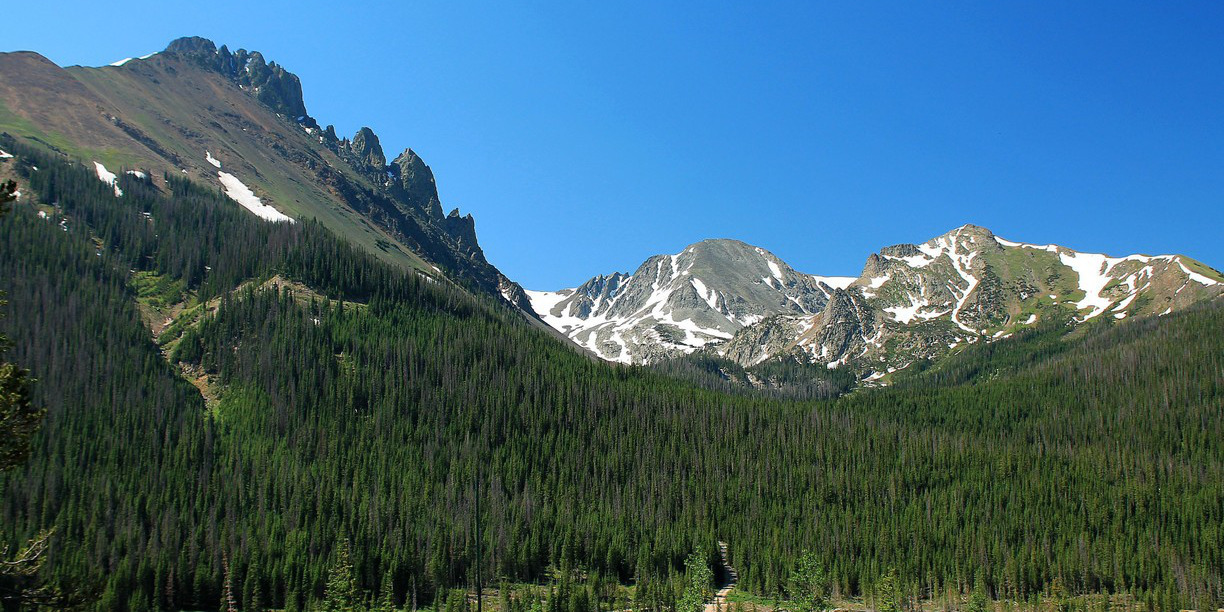

In [1]:
import IPython
#print('Cache la Poudre Wilderness, Colorado')
url = 'https://www.uncovercolorado.com/wp-content/uploads/2018/04/cache-la-poudre-wilderness-colorado-1224x612.jpg'
IPython.display.Image(url, width = 950)

# Part 2: Data description

The dataset is provided by US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type. This training data set contains actual output values so that supervised learning models can be trained on these realy output values.

- Data provided
    - 15120 observations
    - 54 features
    - 1 predictor


Data source: https://www.kaggle.com/c/forest-cover-type-prediction/data

Several issues to be considered in the data include feature engineering, some of the features are in binary format, others are values in floating point.  The features themselves may be correlated. The data does not need to be rebalanced or cleaned to any large extent, but may need to be rescaled.   

Inference: x ---> $\hat{Y}$ = $\hat{f}$ (x,$\theta$)

As mentioned above, the model takes data points x, here a 55 feature space and outputs a classification of the data, here a prediction of the canopy type.


## Tree Classes: y values

The output of the model will be one of the 7 classes provided in the training data.  These classifications, our predicted Y values, are canopy types.  They are listed below folllowed by an image of the Lodgepole Pine.  IN the data set the predicted class, the labels, are a variable Cover_Type.

- 1 Spruce/Fir
- 2 Lodgepole Pine
- 3 Ponderosa Pine
- 4 Cottonwood/Willow
- 5 Aspen
- 6 Douglas-fir
- 7 Krummholz

## Features: X values

- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation



### Wilderness areas

- 1 Rawah Wilderness Area
- 2 Neota Wilderness Area
- 3 Comanche Peak Wilderness Area
- 4 Cache la Poudre Wilderness Area

### Soil types

- 1 Cathedral family - Rock outcrop complex, extremely stony.
- 2 Vanet - Ratake families complex, very stony.
- 3 Haploborolis - Rock outcrop complex, rubbly.
- 4 Ratake family - Rock outcrop complex, rubbly.
- 5 Vanet family - Rock outcrop complex complex, rubbly.
- 6 Vanet - Wetmore families - Rock outcrop complex, stony.
- 7 Gothic family.
- 8 Supervisor - Limber families complex.
- 9 Troutville family, very stony.
- 10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
- 11 Bullwark - Catamount families - Rock land complex, rubbly.
- 12 Legault family - Rock land complex, stony.
- 13 Catamount family - Rock land - Bullwark family complex, rubbly.
- 14 Pachic Argiborolis - Aquolis complex.
- 15 unspecified in the USFS Soil and ELU Survey.
- 16 Cryaquolis - Cryoborolis complex.
- 17 Gateview family - Cryaquolis complex.
- 18 Rogert family, very stony.
- 19 Typic Cryaquolis - Borohemists complex.
- 20 Typic Cryaquepts - Typic Cryaquolls complex.
- 21 Typic Cryaquolls - Leighcan family, till substratum complex.
- 22 Leighcan family, till substratum, extremely bouldery.
- 23 Leighcan family, till substratum - Typic Cryaquolls complex.
- 24 Leighcan family, extremely stony.
- 25 Leighcan family, warm, extremely stony.
- 26 Granile - Catamount families complex, very stony.
- 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
- 28 Leighcan family - Rock outcrop complex, extremely stony.
- 29 Como - Legault families complex, extremely stony.
- 30 Como family - Rock land - Legault family complex, extremely stony.
- 31 Leighcan - Catamount families complex, extremely stony.
- 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
- 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
- 34 Cryorthents - Rock land complex, extremely stony.
- 35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
- 36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
- 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
- 38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
- 39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
- 40 Moran family - Cryorthents - Rock land complex, extremely stony.

# Part 3: Basic data exploration


### Load libraries

In [2]:
# General libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from pandas import DataFrame, read_csv
import os

# SK-learn libraries for models.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

### Load data into dataframe

In [3]:
# Read data from datafile.
file = r'train.csv'
df = pd.read_csv(file)

### Histograms of features

Description of histograms below needed here...


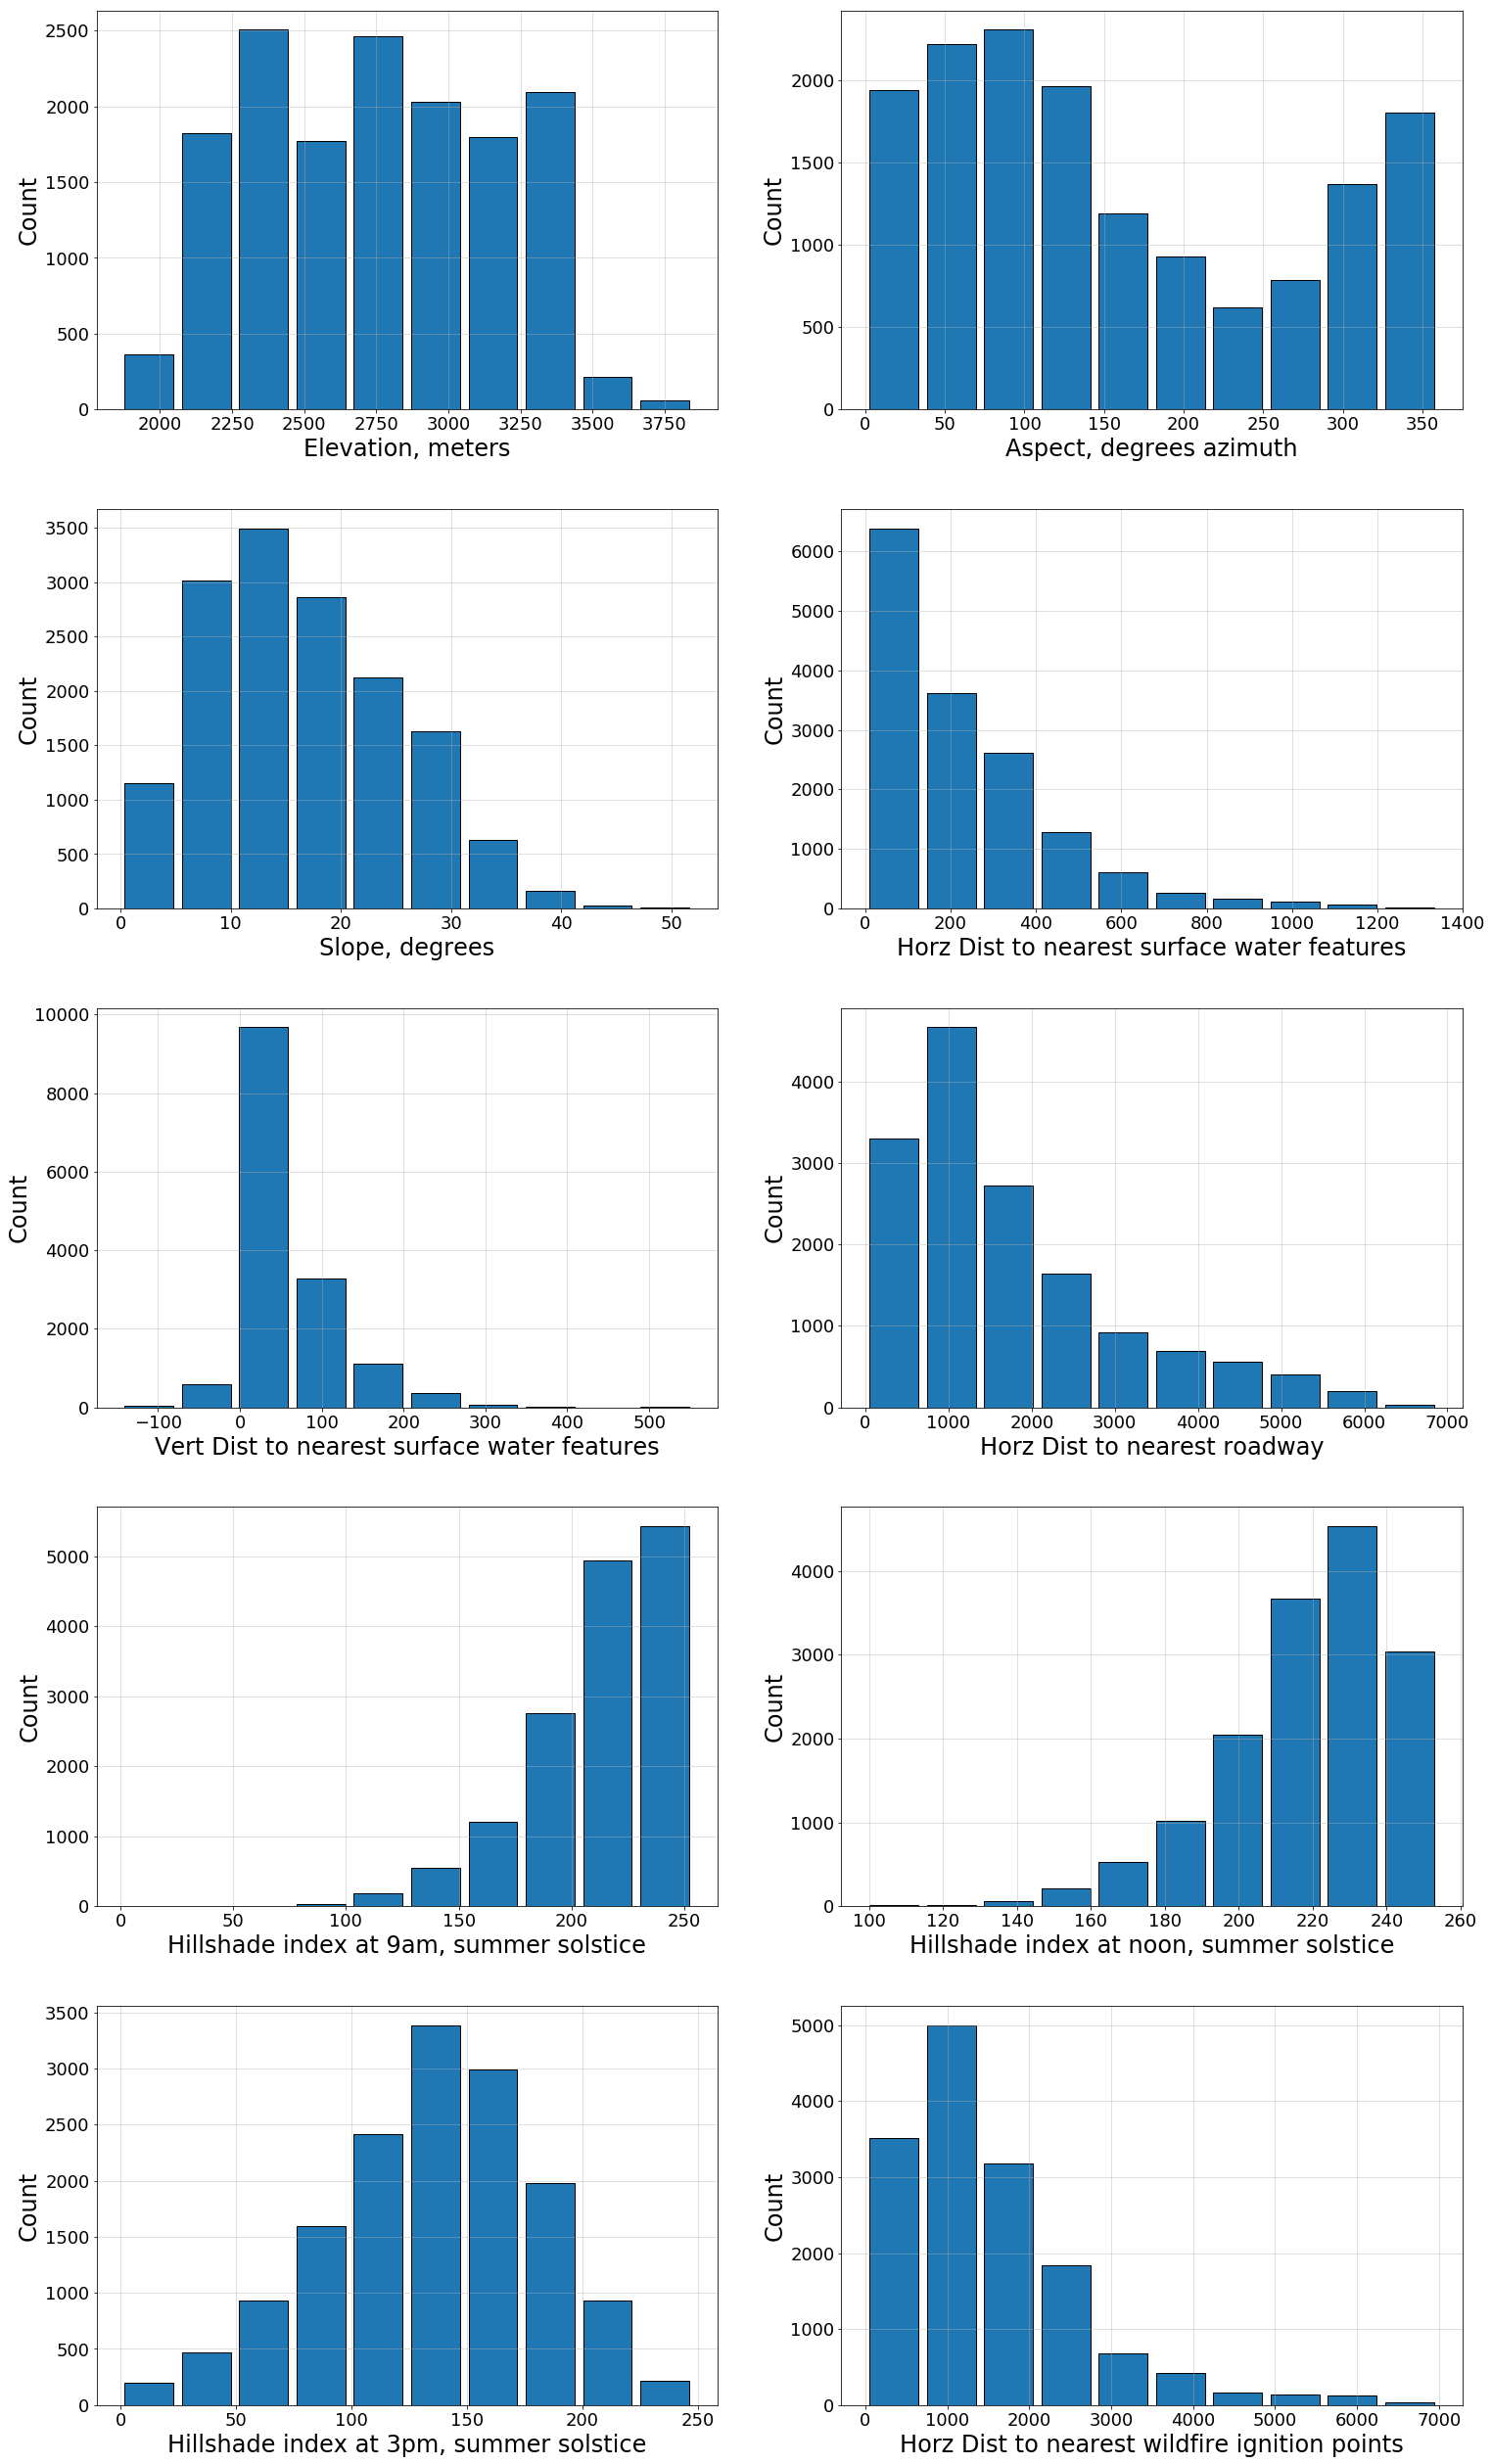

In [4]:
x_label_list = ['Elevation, meters','Aspect, degrees azimuth','Slope, degrees','Horz Dist to nearest surface water features',
               'Vert Dist to nearest surface water features','Horz Dist to nearest roadway','Hillshade index at 9am, summer solstice',
               'Hillshade index at noon, summer solstice','Hillshade index at 3pm, summer solstice','Horz Dist to nearest wildfire ignition points']
col_names = df.columns[1:11].tolist()
fig, ax = plt.subplots(5, 2, figsize=(25,45))
fig.subplots_adjust(hspace=.25)

tally = 0
for r in range(5):
    for c in range(2):
        ax[r,c].hist(df[col_names[tally]], color='tab:blue', rwidth=0.85, edgecolor='black')
        ax[r,c].set_xlabel(x_label_list[tally], size=24)
        ax[r,c].set_ylabel('Count', size=24)
        ax[r,c].tick_params(axis='both', which='major', labelsize=18)
        ax[r,c].grid(alpha =0.5)
        tally += 1


### Representation of soil types

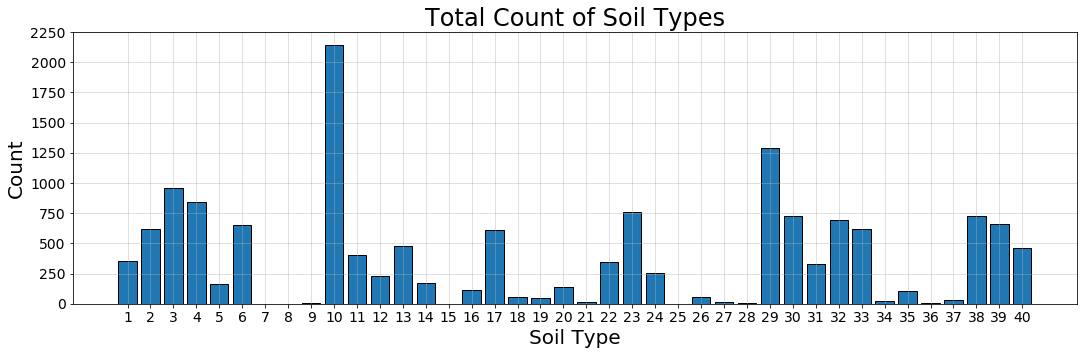

In [6]:
# Soil Type Data Exploration

# Calculate the sum of the soil columns for plotting.
sum_col = df.sum().tolist()
soil_count = sum_col[15:55]
#col_names = df.columns.tolist()
soils = np.arange(1,41)
y_pos = np.arange(len(soils))

f, ax = plt.subplots(figsize=(18,5))
ax.tick_params(axis='both', which='major', labelsize=14)
plt.bar(y_pos, soil_count, align='center', color='tab:blue', edgecolor='black')
plt.xticks(y_pos, soils)
plt.ylabel('Count', size=20)
plt.xlabel('Soil Type', size=20)
plt.title('Total Count of Soil Types', size=24)
plt.grid(alpha=0.5)


### Soil types per tree class

In [7]:
# Count the number of soil types per tree type.

soil_list = ['Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10',
    'Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20',
    'Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30',
    'Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40']

soil_per_tree_list=[]
for loop in range(7):
    soil_per_tree_list += [list(40*[0])]

tally = 0
for row in range(len(df['Cover_Type'])):
    soil_num = 0
    for soil_col in soil_list:
        soil_num += 1
        soil_per_tree_list[df['Cover_Type'][row]-1][soil_num-1] += df[soil_col][row]

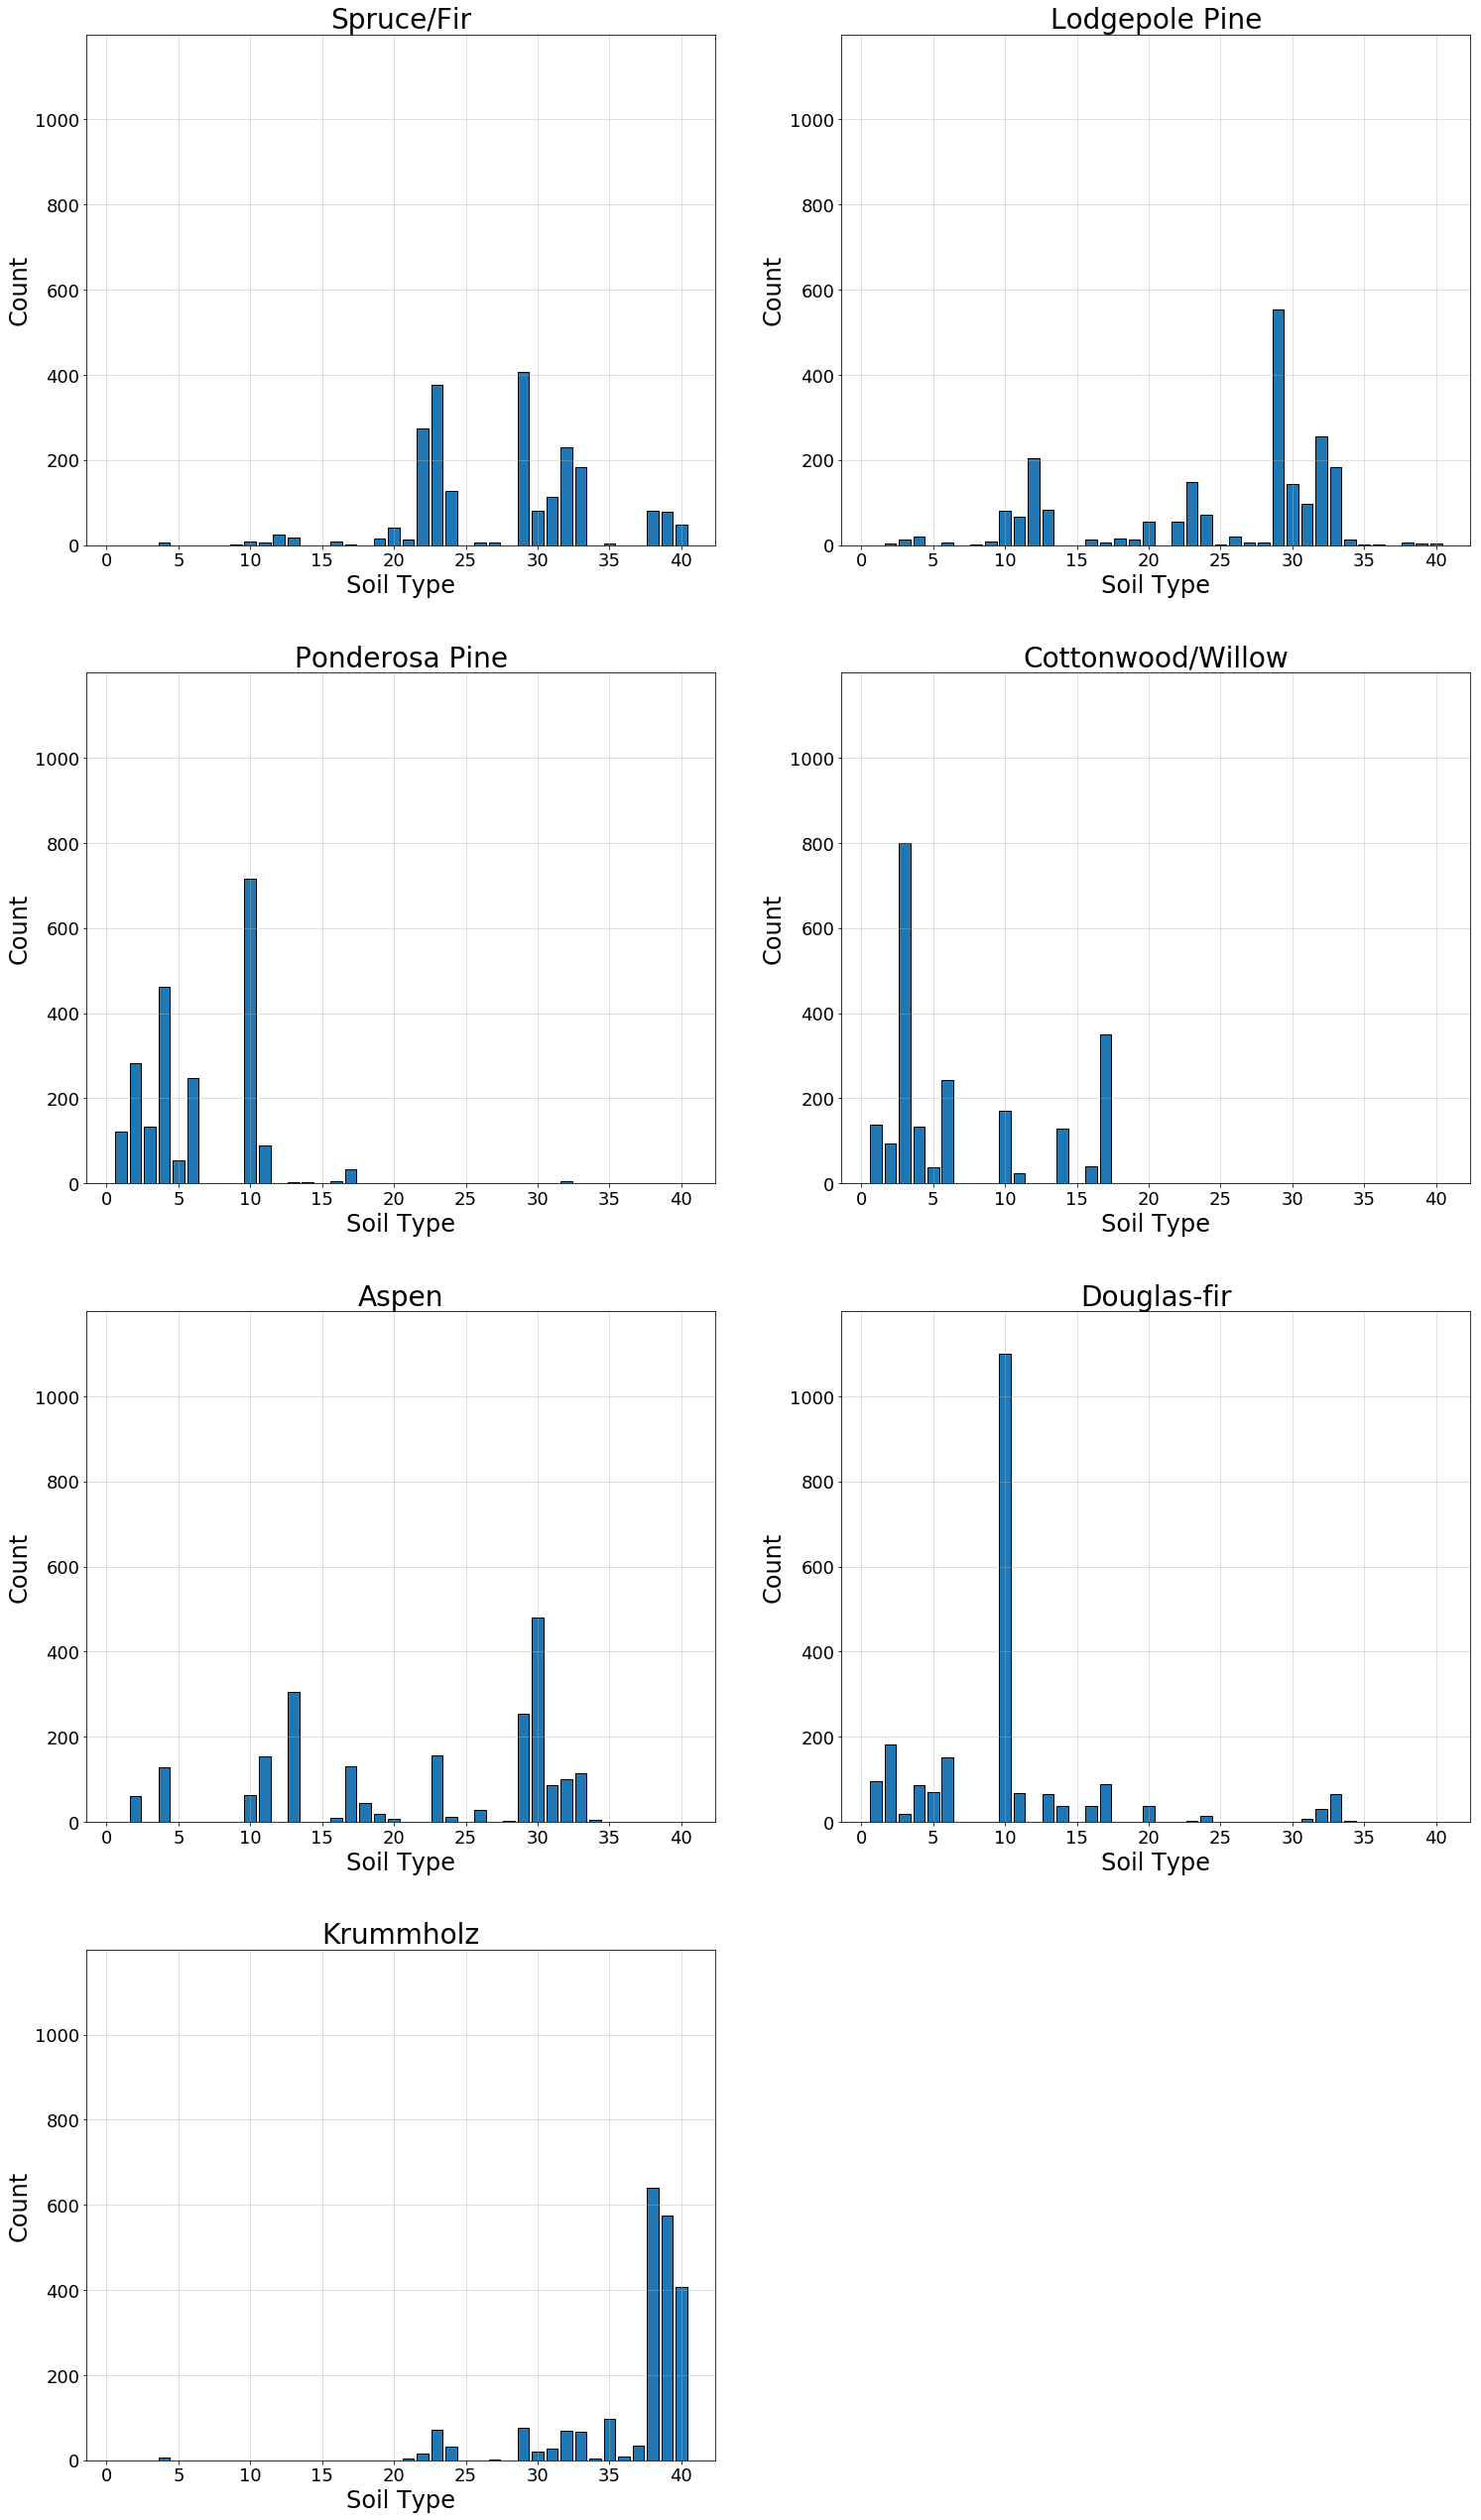

In [8]:
# PLot the number of soil types per tree type.

tree=["Spruce/Fir","Lodgepole Pine","Ponderosa Pine","Cottonwood/Willow","Aspen","Douglas-fir","Krummholz"]
pos = np.arange(1,41)

# Set up figure.
fig,ax =  plt.subplots(4,2, figsize=(25,45))
fig.subplots_adjust(hspace=0.25)
index = 0
for r in range(0,4):
    for c in range(0,2):
        if (r == 3) and (c == 1):
            fig.delaxes(ax[3][1])
            break
        else:
            ax[r][c].bar(pos,soil_per_tree_list[index],color='tab:blue',edgecolor='black')
            ax[r][c].set_title(tree[index],fontsize=28)
            ax[r][c].set_yticks(np.arange(0,1200,200))
            ax[r][c].set_ylim([0,1200])
            ax[r][c].set_ylabel('Count', fontsize=24)
            ax[r][c].set_xlabel('Soil Type', fontsize=24)
            ax[r][c].tick_params(axis='both', which='major', labelsize=18)
            ax[r][c].grid(alpha = 0.5)
            index += 1


### Representation of wilderness areas

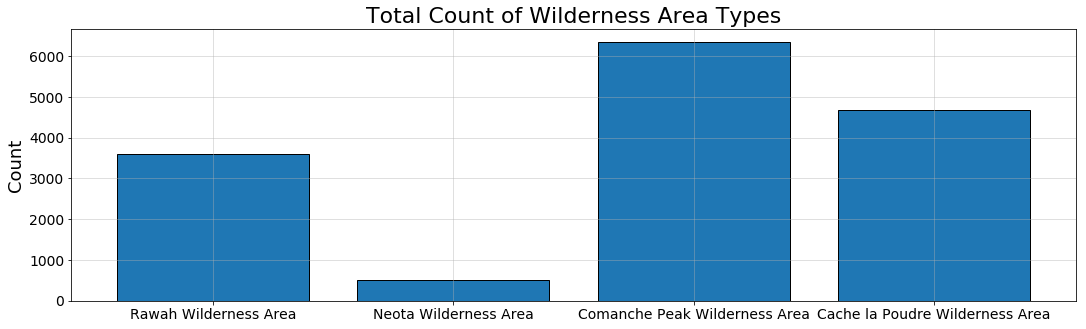

In [10]:
# Wilderness Area Data Exploration

area_list = ['Rawah Wilderness Area','Neota Wilderness Area','Comanche Peak Wilderness Area','Cache la Poudre Wilderness Area']
# Calculate the sum of the soil columns for plotting.
sum_col = df.sum().tolist()
area_count = sum_col[11:15]
y_pos = np.arange(len(area_list))

f, ax = plt.subplots(figsize=(18,5))
plt.bar(y_pos, area_count, align='center', color='tab:blue',edgecolor='black')
plt.xticks(y_pos, area_list)
plt.ylabel('Count',fontsize=18)
plt.title('Total Count of Wilderness Area Types', size=22)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(alpha=0.5)
              

### Wilderness areas per tree type

In [11]:
# Count the number of wilderness areas per tree type.

area_list = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3','Wilderness_Area4']
area_per_tree_list=[]
for loop in range(7):
    area_per_tree_list += [list(4*[0])]

tally = 0
for row in range(len(df['Cover_Type'])):
    area_num = 0
    for area_col in area_list:
        area_num += 1
        area_per_tree_list[df['Cover_Type'][row]-1][area_num-1] += df[area_col][row]

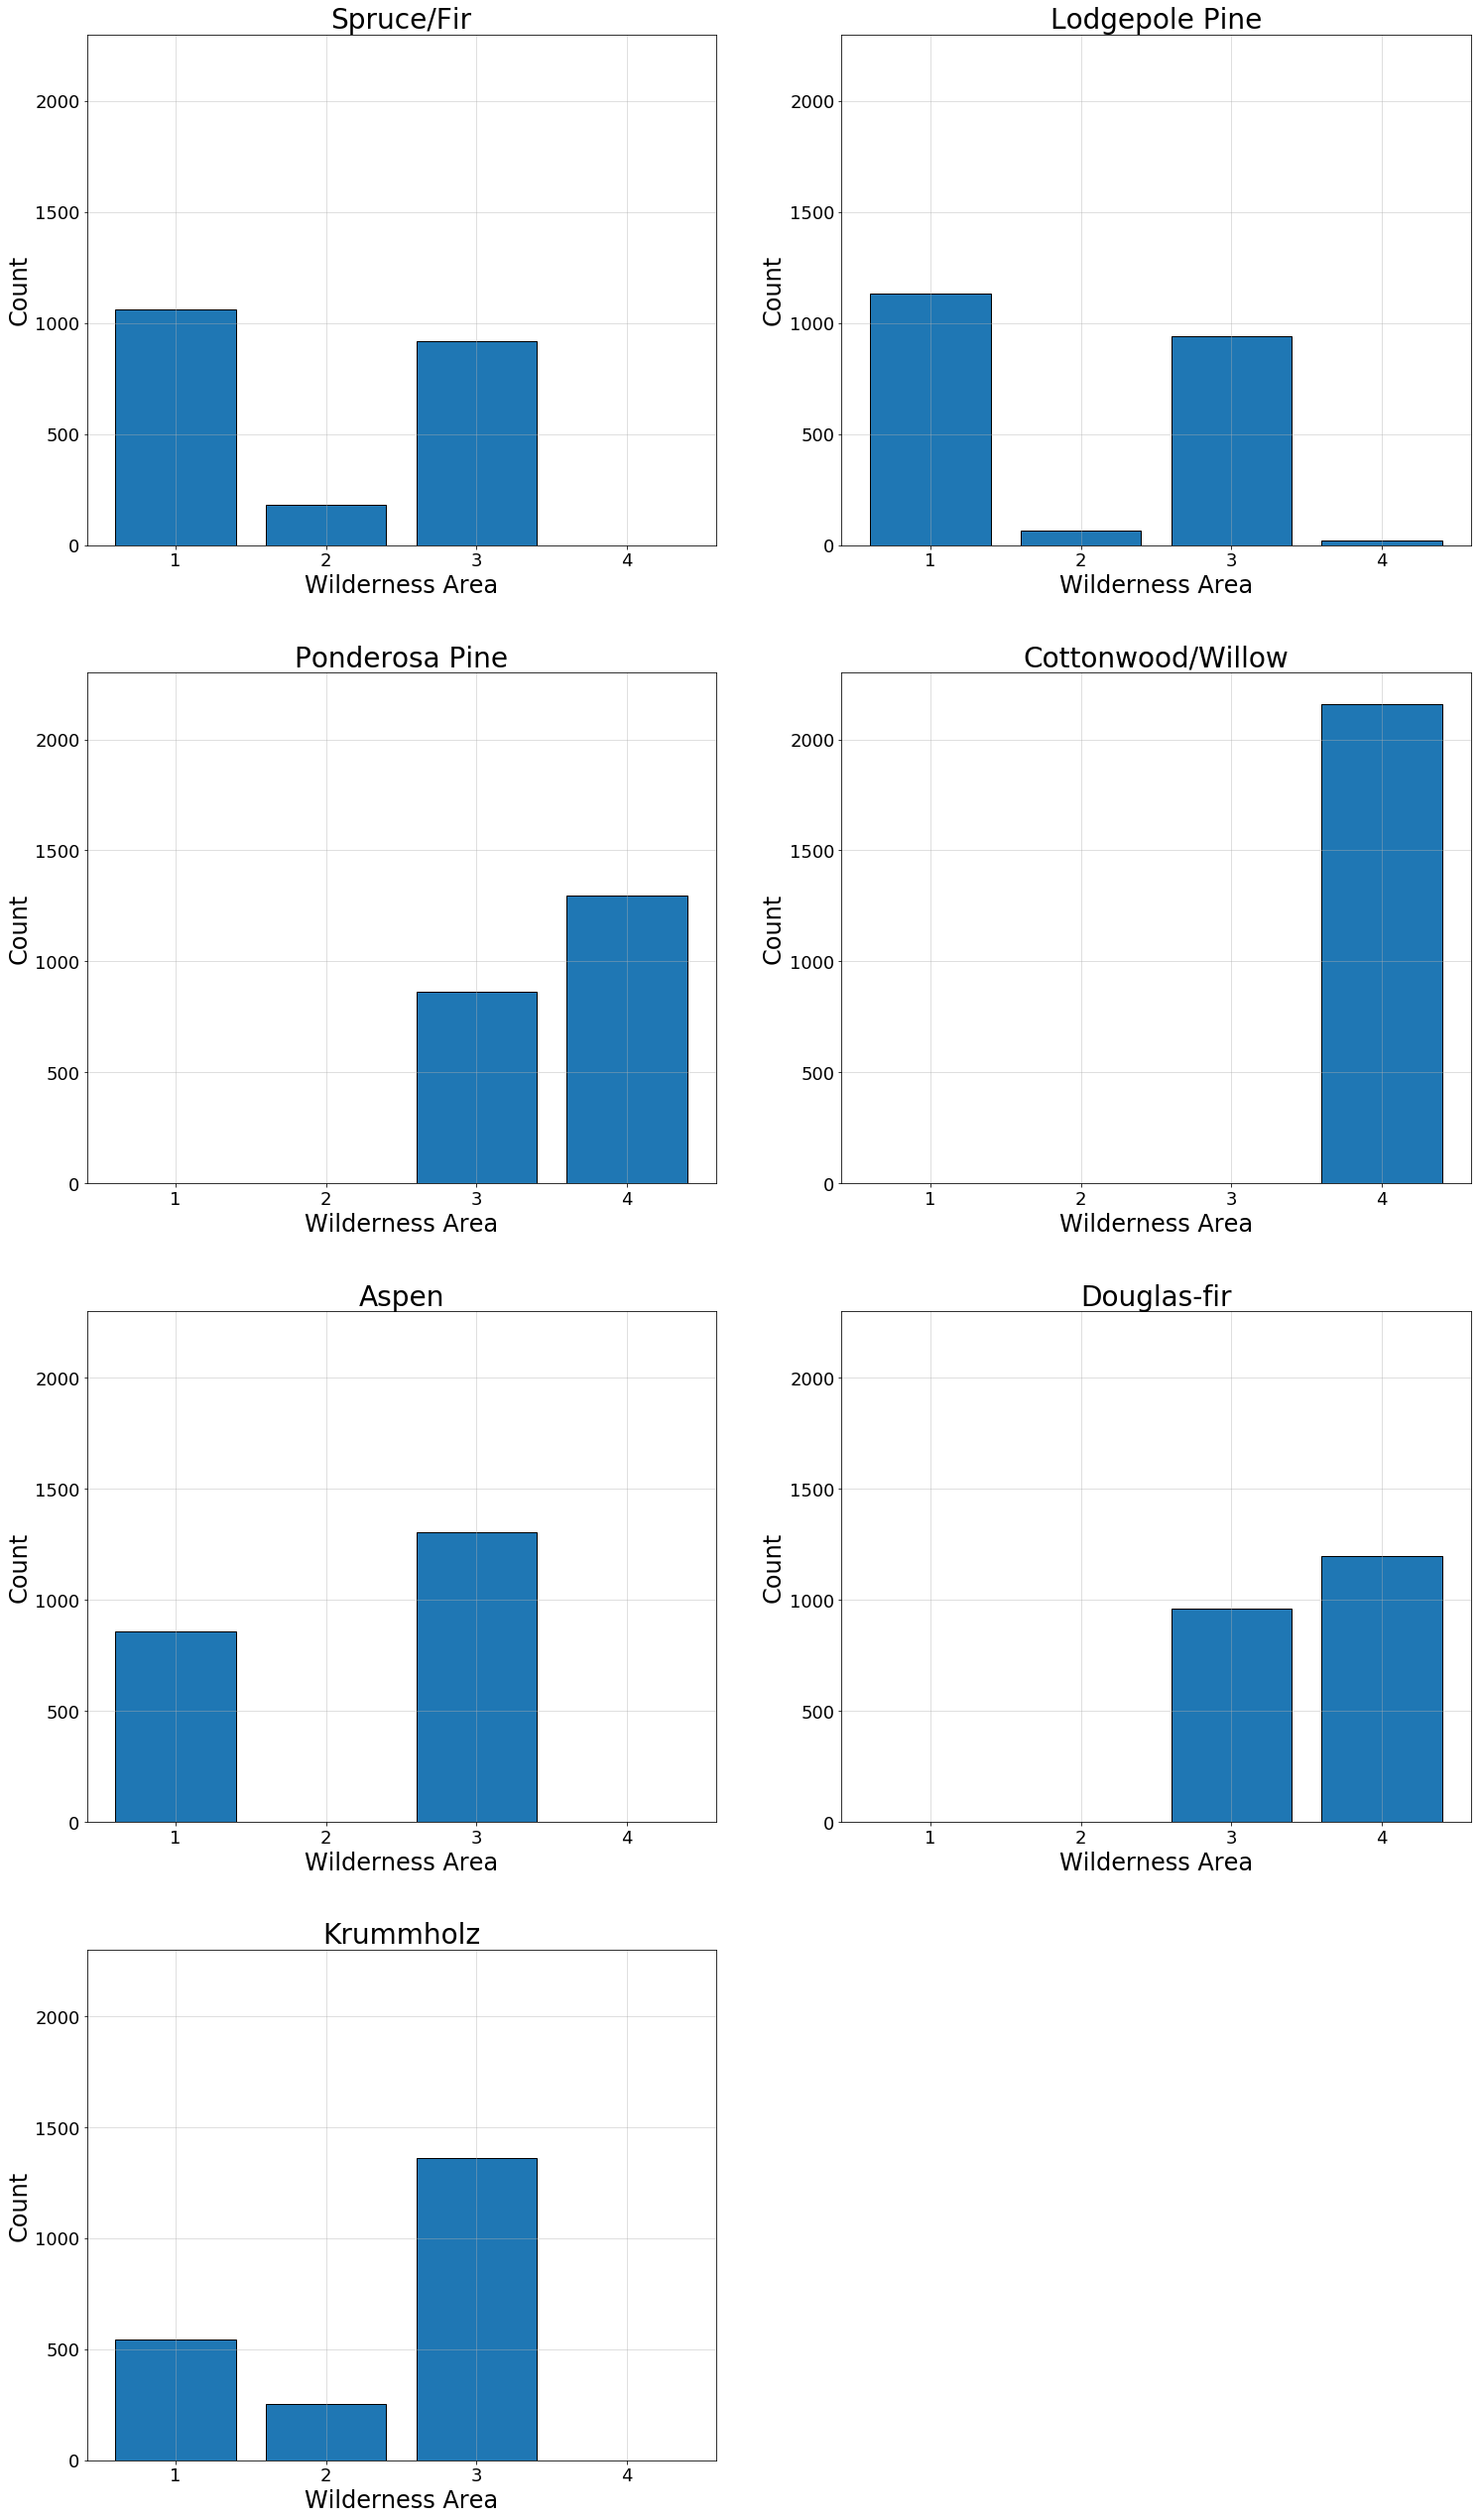

In [12]:
# PLot the number of wilderness areas per tree type.

area_list = ['Rawah Wilderness Area','Neota Wilderness Area','Comanche Peak Wilderness Area','Cache la Poudre Wilderness Area']

tree=["Spruce/Fir","Lodgepole Pine","Ponderosa Pine","Cottonwood/Willow","Aspen","Douglas-fir","Krummholz"]
pos = np.arange(1,5)

# Set up figure.
fig,ax =  plt.subplots(4,2, figsize=(25,45))
fig.subplots_adjust(hspace=0.25)
index = 0
for r in range(0,4):
    for c in range(0,2):
        if (r == 3) and (c == 1):
            fig.delaxes(ax[3][1])
            break
        else:
            ax[r][c].bar(pos,area_per_tree_list[index],color='tab:blue',edgecolor='black')
            ax[r][c].set_title(tree[index],fontsize=28)
            ax[r][c].set_yticks(np.arange(0,2300,500))
            ax[r][c].set_ylim([0,2300])
            ax[r][c].set_ylabel('Count', fontsize=24)
            ax[r][c].set_xlabel('Wilderness Area', fontsize=24)
            ax[r][c].tick_params(axis='both', which='major', labelsize=18)
            ax[r][c].set_xticks(np.arange(1,5))
            ax[r][c].grid(alpha=0.5)
            index += 1


# Part 4: Data preparation for modeling

## Feature Scaling

In [13]:
# Rescale data using min-max normalization to force data into [0,1] range.
def rescale(data_col):
    return (data_col - min(data_col))/(max(data_col)-min(data_col))

In [14]:
# Data after rescaling.
col_names = df.columns[1:15]
for loop in (col_names):
    df[loop] = rescale(df[loop])
    
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,0.369084,0.141667,0.057692,0.192107,0.208571,0.074020,0.870079,0.858065,0.596774,...,0,0,0,0,0,0,0,0,0,5
1,2,0.366062,0.155556,0.038462,0.157856,0.200000,0.056604,0.866142,0.877419,0.608871,...,0,0,0,0,0,0,0,0,0,5
2,3,0.473817,0.386111,0.173077,0.199553,0.301429,0.461538,0.921260,0.896774,0.544355,...,0,0,0,0,0,0,0,0,0,2
3,4,0.464250,0.430556,0.346154,0.180194,0.377143,0.448476,0.937008,0.896774,0.491935,...,0,0,0,0,0,0,0,0,0,2
4,5,0.368580,0.125000,0.038462,0.113924,0.207143,0.056749,0.866142,0.870968,0.604839,...,0,0,0,0,0,0,0,0,0,5


## Create train and dev sets


In [15]:
# General function for splitting the data in a random order.
def split_data(data, train_pct, random_seed):
    np.random.seed(random_seed)
    random_indices = np.random.permutation(len(data))
    train_end = int(len(data)*train_pct)
    train_indices = random_indices[:train_end]
    test_indices = random_indices[train_end:]
    return data.iloc[train_indices],data.iloc[test_indices]


In [16]:
# Split data into 80% train and 20% dev.
# Set random seed to maintain random permutation order.

X_train, X_dev = split_data(df, 0.8, 1234)

# Train data
y_train = X_train['Cover_Type']
del X_train['Id']
del X_train['Cover_Type']

# Dev data
y_dev = X_dev['Cover_Type']
del X_dev['Id']
del X_dev['Cover_Type']

print('Length of train set: ', len(X_train))
print('Length of dev set: ', len(X_dev))
print('Percentage of train set: ', round(len(X_train)/(len(X_train) + len(X_dev)),3))

Length of train set:  12096
Length of dev set:  3024
Percentage of train set:  0.8


# Part 5: Standard models

## Logistic Regression Model



Optimizing logistic regression model:


Text(0, 0.5, 'F1 score')

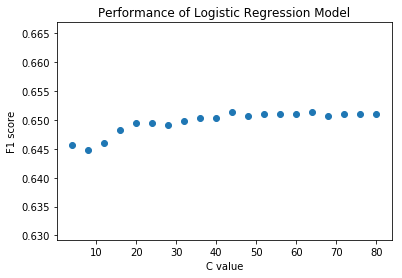

In [17]:
# Train data.
X = np.array(X_train)
y = np.array(y_train)

# Dev data.
X_dev_set = np.array(X_dev)
y_dev_set = np.array(y_dev)

# Logistic regression model: find optimal value for the regularization strength C using l2 regularization.
print('Optimizing logistic regression model:')

F1_score_list = []
C_list = []
for loop in range(4,81,4):
    # Make model with train set.
    lgr = LogisticRegression(C = loop, penalty='l2', multi_class ='ovr', solver = 'liblinear')
    lgr.fit(X, y)
    # Tune model with dev set.
    y_pred = lgr.predict(X_dev_set)
    y_true = y_dev_set
    lgr_score = metrics.f1_score(y_true, y_pred, average="weighted")
    F1_score_list += [lgr_score]
    C_list += [loop]

# Plot prediction vs. true label.
plt.scatter(C_list,F1_score_list)
plt.title('Performance of Logistic Regression Model')
plt.xlabel('C value')
plt.ylabel('F1 score')


In [26]:
# logistic Regression model.

# Train data.
X = X_train
y = np.array(y_train)

# Model using train data.
lgr = LogisticRegression(C = 44, penalty='l2', multi_class ='ovr', solver = 'liblinear')
lgr.fit(X, y)
# Prediction using train data
y_pred = lgr.predict(X)
lgr_score = metrics.f1_score(y, y_pred, average="weighted")

tally = 0
for loop in range(len(y_pred)):
    if y_pred[loop] == y[loop]:
        tally += 1
print('Logistic regression model')
print('Train accuracy = {:2.1f}%'.format(tally/len(y_pred)*100))


Logistic regression model
Train accuracy = 68.4%


In [27]:
# Dev data.
X = X_dev
y = np.array(y_dev)

# Prediction of dev data
y_pred = lgr.predict(X)
lgr_score = metrics.f1_score(y, y_pred, average="weighted")

# Calculate acccurcy
tally = 0
for loop in range(len(y_pred)):
    if y_pred[loop] == y[loop]:
        tally += 1
print('Logistic regression model')
print('Dev accuracy = {:2.1f}%'.format(tally/len(y_pred)*100))


Logistic regression model
Dev accuracy = 65.2%


## K nearest neighbor

In [35]:

# Train data.
X = np.array(X_train)
y = np.array(y_train)

# K-nearest-neighbor model: find optimal value for k.
print('Optimizing k-nearest-neighbor model:')
k_values = [1, 3, 5, 7, 9]
accuracy = []
for loop in (k_values):
    # k-nearest-neighbor model using k values from input.
    knn = KNeighborsClassifier(n_neighbors=loop)
    knn.fit(X, y)
    # Add result to accuracy list.
    accuracy += [round(knn.score(X, y),3)]
print('Accuracy score:', accuracy)
print('k:', k_values)


Optimizing k-nearest-neighbor model:
Accuracy score: [1.0, 0.899, 0.863, 0.838, 0.822]
k: [1, 3, 5, 7, 9]


In [36]:
# 1NN model using train data and k = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
y = np.array(y)
knn_score = knn.score(X, y)

# Calculate acccurcy
tally = 0
for loop in range(len(y)):
    if y_pred[loop] == y[loop]:
        tally += 1
print('1-nearest-neighbor model')
print('Train accuracy = {:2.1f}%'.format(tally/len(y)*100))


1-nearest-neighbor model
Train accuracy = 100.0%


In [38]:
# Dev data.
X = np.array(X_dev)
y = np.array(y_dev)

# 1NN model using dev data and k = 1
y_pred = knn.predict(X)

# Calculate acccurcy
tally = 0
for loop in range(len(y)):
    if y_pred[loop] == y[loop]:
        tally += 1
print('1-nearest-neighbor model')
print('Dev accuracy = {:2.1f}%'.format(tally/len(y)*100))


1-nearest-neighbor model
Dev accuracy = 80.8%


## Decision tree regressor

In [39]:
# Train data.
X = X_train
y = np.array(y_train)

# Decision tree regressor model
dtr = DecisionTreeRegressor()
dtr.fit(X,y)
y_pred = dtr.predict(X)

# Calculate acccuracy
tally = 0
for loop in range(len(y)):
    if y_pred[loop] == y[loop]:
        tally += 1
print('Decision tree regressor')
print('Train accuracy = {:2.1f}%'.format(tally/len(y)*100))

Decision tree regressor
Train accuracy = 100.0%


In [40]:
# Dev data.
X = X_dev
y = np.array(y_dev)

# Prediction of dev data
y_pred = dtr.predict(X)

# Calculate acccuracy
tally = 0
for loop in range(len(y)):
    if y_pred[loop] == y[loop]:
        tally += 1
print('Decision tree regressor')
print('Dev accuracy = {:2.1f}%'.format(tally/len(y)*100))

Decision tree regressor
Dev accuracy = 78.3%


In [41]:
# Cross validation

X = X_train
y = np.array(y_train)
scores = cross_val_score(dtr, X, y, scoring = 'accuracy', cv=10)
scores

array([0.79504132, 0.7785124 , 0.78181818, 0.77520661, 0.75371901,
       0.7768595 , 0.76592225, 0.78990902, 0.78163772, 0.77088503])

## Random forest classifier

In [42]:

# Train data.
X = X_train
y = np.array(y_train)

# Random forest model
clf = RandomForestClassifier(criterion='gini', n_estimators=290)
clf.fit(X, y)
y_pred = clf.predict(X)

# Calculate acccuracy
tally = 0
for loop in range(len(y)):
    if y_pred[loop] == y[loop]:
        tally += 1
print('Random forest classifier')
print('Train accuracy = {:2.1f}%'.format(tally/len(y)*100))

Random forest classifier
Train accuracy = 100.0%


In [43]:
# Optimize n_estimators

param_grid = [ {'n_estimators':[280,290,300,310,320]}]
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring = 'accuracy')

grid_search.fit(X,y)
grid_search.best_params_

{'n_estimators': 310}

In [44]:
# Dev data.
X = X_dev
y = np.array(y_dev)

# Prediction of dev data
y_pred = clf.predict(X)

# Calculate acccuracy
tally = 0
for loop in range(len(y)):
    if y_pred[loop] == y[loop]:
        tally += 1
print('Random forest classifier')
print('Dev accuracy = {:2.1f}%'.format(tally/len(y)*100))

Random forest classifier
Dev accuracy = 86.2%


In [45]:
# Confusion matrix
labels = [1,2,3,4,5,6,7]
print('\n', confusion_matrix(y, y_pred, labels=labels))


 [[315  67   0   0  12   2  26]
 [ 68 311  10   0  23  12   2]
 [  0   2 345  24   4  53   0]
 [  0   0  11 427   0   3   0]
 [  1   9   4   0 420   4   0]
 [  0   2  45   7   5 383   0]
 [ 18   2   0   0   0   0 407]]


In [46]:
# labels that are most confused: 1 and 2, 3 and 6
# Confusion matrix
labels = [1,2,3,6]
print('\n', confusion_matrix(y, y_pred, labels=labels))


 [[315  67   0   2]
 [ 68 311  10  12]
 [  0   2 345  53]
 [  0   2  45 383]]


# Part 6: Advanced approaches to increase accuracy

## Confusion: certain trees are often mislabeled

- Tree list:
    1. Spruce/Fir
    2. Lodgepole Pine
    3. Ponderosa Pine
    4. Cottonwood/Willow
    5. Aspen
    6. Douglas-fir
    7. Krummholz
    
    
- Spruce/Fir and Lodgepole Pine combine for 137 misclassifications in the confusion matrix.
- Ponderosa Pine and Douglas-fir combine for 93 misclassifications in the confusion matrix.

## Plots of features for Pines and Firs

In [53]:
# Read data from datafile since df was rescaled
file = r'train.csv'
df2 = pd.read_csv(file)

# Set list for labels
x_label_list = ['Elevation, meters','Aspect, degrees azimuth','Slope, degrees','Horz Dist to nearest surface water features',
               'Vert Dist to nearest surface water features','Horz Dist to nearest roadway','Hillshade index at 9am, summer solstice',
               'Hillshade index at noon, summer solstice','Hillshade index at 3pm, summer solstice','Horz Dist to nearest wildfire ignition points']


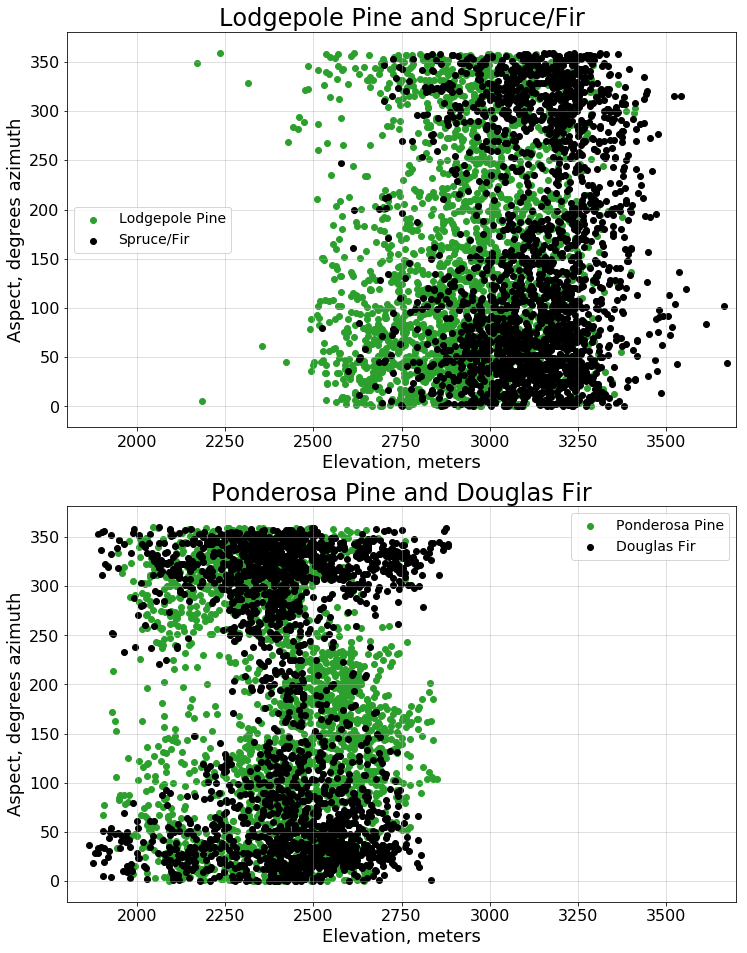

In [58]:

# First plot data
x1 = df2.Elevation[df.Cover_Type == 1]
y1 = df2.Aspect[df.Cover_Type == 1]
x2 = df2.Elevation[df.Cover_Type == 2]
y2 = df2.Aspect[df.Cover_Type == 2]
# Second plot data
x3 = df2.Elevation[df.Cover_Type == 3]
y3 = df2.Aspect[df.Cover_Type == 3]
x6 = df2.Elevation[df.Cover_Type == 6]
y6 = df2.Aspect[df.Cover_Type == 6]

# Set up figure.
fig,ax =  plt.subplots(2,1, figsize=(12,16))
for loop in range(2):
    ax[loop].set_xlabel(x_label_list[0], size = 18)
    ax[loop].set_ylabel(x_label_list[1], size = 18)
    ax[loop].grid(alpha=0.5)
    ax[loop].tick_params(axis='both', which='major', labelsize=16)
    ax[loop].set_xlim(1800,3700)

# First plot
ax[0].scatter(x2,y2, color = 'tab:green', label='Lodgepole Pine')
ax[0].scatter(x1,y1, color = 'k', label='Spruce/Fir')
ax[0].set_title("Lodgepole Pine and Spruce/Fir", size=24)
ax[0].legend(fontsize = 14, loc = 'best') 
# Second plot
ax[1].scatter(x3,y3, color = 'tab:green', label='Ponderosa Pine')
ax[1].scatter(x6,y6, color = 'k', label='Douglas Fir')
ax[1].set_title("Ponderosa Pine and Douglas Fir", size=24)
ax[1].legend(fontsize = 14, loc = 'best') 

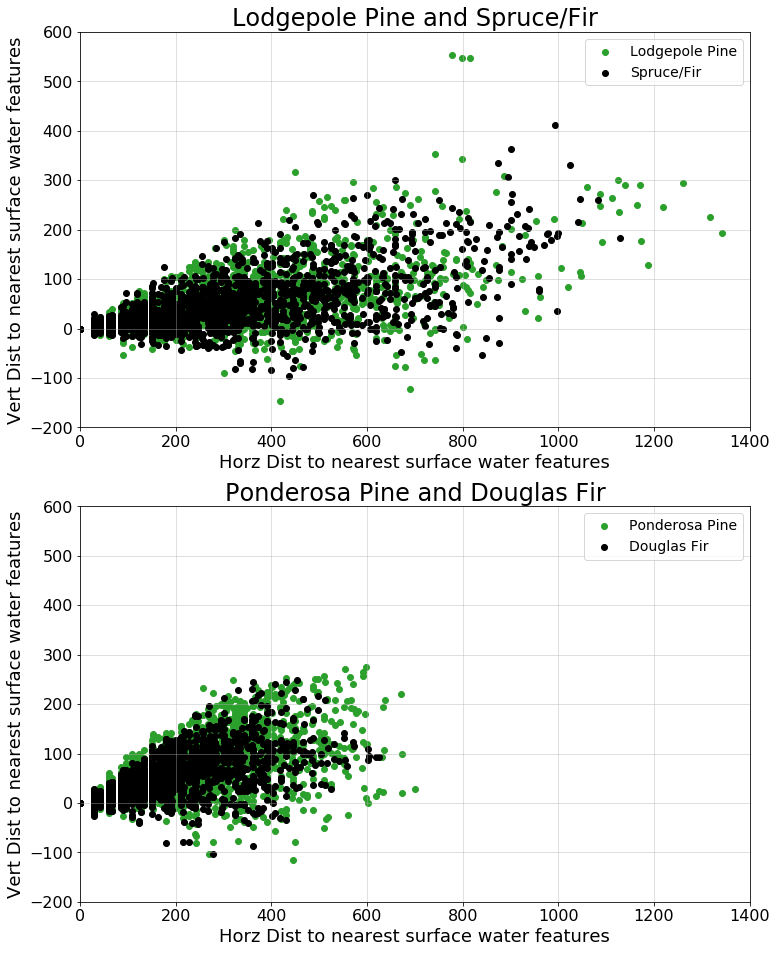

In [61]:

# First plot data
x1 = df2.Horizontal_Distance_To_Hydrology[df.Cover_Type == 1]
y1 = df2.Vertical_Distance_To_Hydrology[df.Cover_Type == 1]
x2 = df2.Horizontal_Distance_To_Hydrology[df.Cover_Type == 2]
y2 = df2.Vertical_Distance_To_Hydrology[df.Cover_Type == 2]
# Second plot data
x3 = df2.Horizontal_Distance_To_Hydrology[df.Cover_Type == 3]
y3 = df2.Vertical_Distance_To_Hydrology[df.Cover_Type == 3]
x6 = df2.Horizontal_Distance_To_Hydrology[df.Cover_Type == 6]
y6 = df2.Vertical_Distance_To_Hydrology[df.Cover_Type == 6]

# Set up figure.
fig,ax =  plt.subplots(2,1, figsize=(12,16))
for loop in range(2):
    ax[loop].set_xlabel(x_label_list[3], size = 18)
    ax[loop].set_ylabel(x_label_list[4], size = 18)
    ax[loop].grid(alpha=0.5)
    ax[loop].tick_params(axis='both', which='major', labelsize=16)
    ax[loop].set_xlim(0,1400)
    ax[loop].set_ylim(-200,600)
    
# First plot
ax[0].scatter(x2,y2, color = 'tab:green', label = "Lodgepole Pine")
ax[0].scatter(x1,y1, color = 'k', label = "Spruce/Fir")
ax[0].set_title("Lodgepole Pine and Spruce/Fir", size=24)
ax[0].legend(fontsize = 14, loc = 'best') 
# Second plot
ax[1].scatter(x3,y3, color = 'tab:green', label = "Ponderosa Pine")
ax[1].scatter(x6,y6, color = 'k', label = "Douglas Fir")
ax[1].set_title("Ponderosa Pine and Douglas Fir", size=24)    
ax[1].legend(fontsize = 14, loc = 'best') 
    

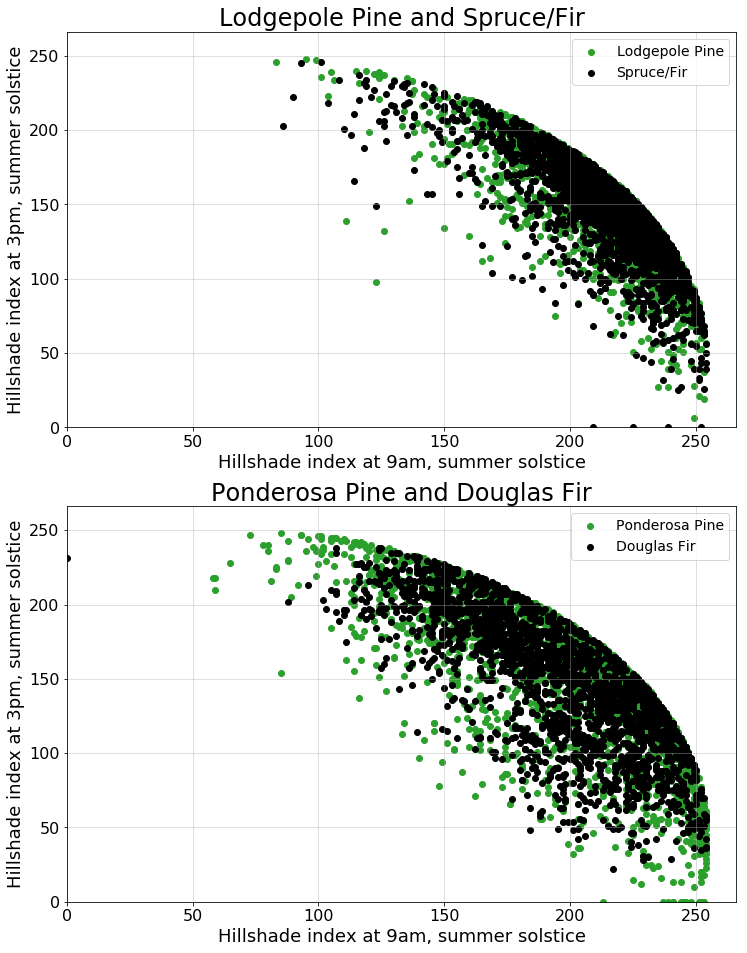

In [59]:

# First plot data 
x1 = df2.Hillshade_9am[df.Cover_Type == 1]
y1 = df2.Hillshade_3pm[df.Cover_Type == 1]
x2 = df2.Hillshade_9am[df.Cover_Type == 2]
y2 = df2.Hillshade_3pm[df.Cover_Type == 2]
# Second plot data
x3 = df2.Hillshade_9am[df.Cover_Type == 3]
y3 = df2.Hillshade_3pm[df.Cover_Type == 3]
x6 = df2.Hillshade_9am[df.Cover_Type == 6]
y6 = df2.Hillshade_3pm[df.Cover_Type == 6]


# Set up figure.
fig,ax =  plt.subplots(2,1, figsize=(12,16))
for loop in range(2):
    ax[loop].set_xlabel(x_label_list[6], size = 18)
    ax[loop].set_ylabel(x_label_list[8], size = 18)
    ax[loop].grid(alpha=0.5)
    ax[loop].tick_params(axis='both', which='major', labelsize=16)
    ax[loop].set_xlim(0,266)
    ax[loop].set_ylim(0,266)
    
# First plot
ax[0].scatter(x2,y2, color = 'tab:green', label = "Lodgepole Pine")
ax[0].scatter(x1,y1, color = 'k', label = "Spruce/Fir")
ax[0].set_title("Lodgepole Pine and Spruce/Fir", size=24)
ax[0].legend(fontsize = 14, loc = 'best') 
# Second plot
ax[1].scatter(x3,y3, color = 'tab:green', label = "Ponderosa Pine")
ax[1].scatter(x6,y6, color = 'k', label = "Douglas Fir")
ax[1].set_title("Ponderosa Pine and Douglas Fir", size=24)    
ax[1].legend(fontsize = 14, loc = 'best') 



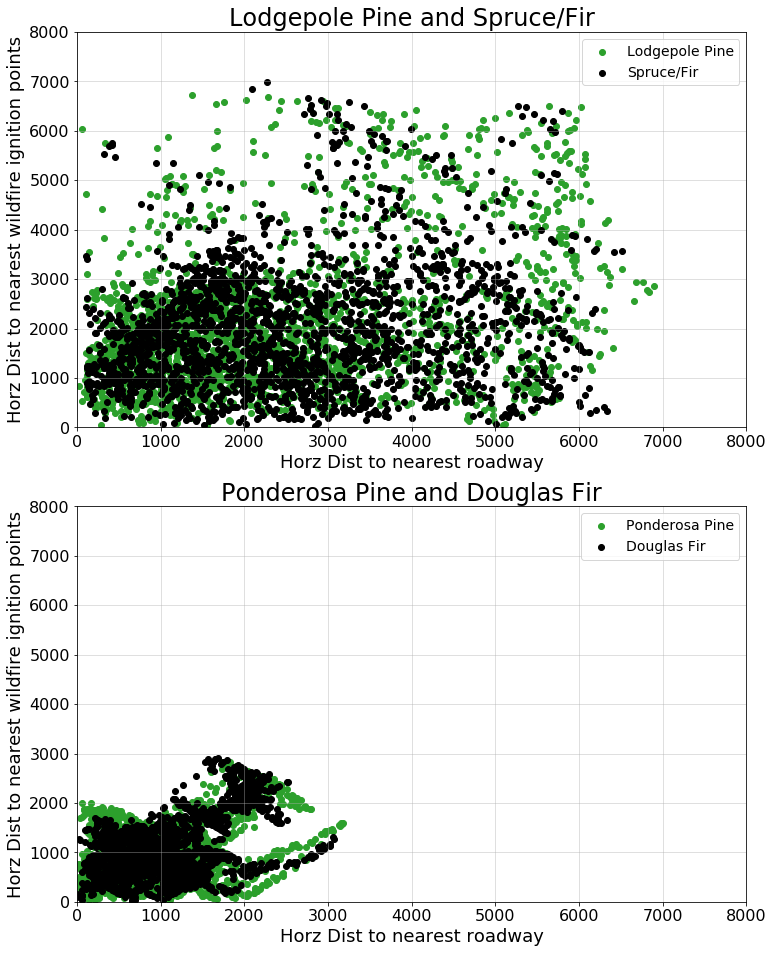

In [63]:

# First plot data 
x1 = df2.Horizontal_Distance_To_Roadways[df.Cover_Type == 1]
y1 = df2.Horizontal_Distance_To_Fire_Points[df.Cover_Type == 1]
x2 = df2.Horizontal_Distance_To_Roadways[df.Cover_Type == 2]
y2 = df2.Horizontal_Distance_To_Fire_Points[df.Cover_Type == 2]
# First plot data 
x3 = df2.Horizontal_Distance_To_Roadways[df.Cover_Type == 3]
y3 = df2.Horizontal_Distance_To_Fire_Points[df.Cover_Type == 3]
x6 = df2.Horizontal_Distance_To_Roadways[df.Cover_Type == 6]
y6 = df2.Horizontal_Distance_To_Fire_Points[df.Cover_Type == 6]

# Set up figure.
fig,ax =  plt.subplots(2,1, figsize=(12,16))
for loop in range(2):
    ax[loop].set_xlabel(x_label_list[5], size = 18)
    ax[loop].set_ylabel(x_label_list[9], size = 18)
    ax[loop].grid(alpha=0.5)
    ax[loop].tick_params(axis='both', which='major', labelsize=16)
    ax[loop].set_xlim(0,8000)
    ax[loop].set_ylim(0,8000)
    
# First plot
ax[0].scatter(x2,y2, color = 'tab:green', label = "Lodgepole Pine")
ax[0].scatter(x1,y1, color = 'k', label = "Spruce/Fir")
ax[0].set_title("Lodgepole Pine and Spruce/Fir", size=24)
ax[0].legend(fontsize = 14, loc = 'best') 
# Second plot
ax[1].scatter(x3,y3, color = 'tab:green', label = "Ponderosa Pine")
ax[1].scatter(x6,y6, color = 'k', label = "Douglas Fir")
ax[1].set_title("Ponderosa Pine and Douglas Fir", size=24)    
ax[1].legend(fontsize = 14, loc = 'best')



## Methods to improve accuracy

### Method 1: Two-tiered random forest with Firs and Pines as a single class

In [ ]:
y_train_confused = y_train.copy()

In [ ]:
# Merge firs and pines from train set into category 8

y_train_confused[y_train_confused == 1] = 8
y_train_confused[y_train_confused == 2] = 8
y_train_confused[y_train_confused == 3] = 8
y_train_confused[y_train_confused == 6] = 8

In [ ]:
# Train data.
X = X_train
y = np.array(y_train_confused)

clf = RandomForestClassifier(criterion='gini', n_estimators=290)
clf.fit(X, y)
y_pred = clf.predict(X)

# Calculate acccuracy
tally = 0
for loop in range(len(y)):
    if y_pred[loop] == y[loop]:
        tally += 1
print('Train Accuracy = {:2.1f}%'.format(tally/len(y)*100))

In [ ]:
# Merge firs and pines from dev set into category 8

y_dev_confused = y_dev.copy()
y_dev_confused[y_dev_confused == 1] = 8
y_dev_confused[y_dev_confused == 2] = 8
y_dev_confused[y_dev_confused == 3] = 8
y_dev_confused[y_dev_confused == 6] = 8

In [ ]:
# Dev data.
X = X_dev
y = np.array(y_dev_confused)

y_pred = clf.predict(X)

# Calculate acccuracy
tally = 0
for loop in range(len(y)):
    if y_pred[loop] == y[loop]:
        tally += 1
print('Dev Accuracy = {:2.1f}%'.format(tally/len(y)*100))

In [ ]:
# Confusion matrix
labels = [4,5,7,8]
print('\n', confusion_matrix(y, y_pred, labels=labels))

### Now separate firs and pines and run random forest model again

In [ ]:
X_8 = X_train[y_train_confused==8]
y_8 = y_train[y_train_confused==8]

In [ ]:
# Train data.

X = X_8
y = np.array(y_8)

clf = RandomForestClassifier(criterion='gini', n_estimators=320)
clf.fit(X, y)
y_pred = clf.predict(X)

# Calculate acccuracy
tally = 0
for loop in range(len(y)):
    if y_pred[loop] == y[loop]:
        tally += 1
print('Train Accuracy = {:2.1f}%'.format(tally/len(y)*100))

In [ ]:


param_grid = [ {'n_estimators':[310,320,330]}]

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring = 'accuracy')
grid_search.fit(X,y)
grid_search.best_params_

In [ ]:
X_dev_8 = X_dev[y_dev_confused==8]
y_dev_8 = y_dev[y_dev_confused==8]

In [ ]:
# Dev data.
X = X_dev_8
y = np.array(y_dev_8)

y_pred = clf.predict(X)

# Calculate acccuracy
tally = 0
for loop in range(len(y)):
    if y_pred[loop] == y[loop]:
        tally += 1
print('Dev Accuracy = {:2.1f}%'.format(tally/len(y)*100))

In [ ]:
# Confusion matrix
labels = [1,2,3,6]
print('\n', confusion_matrix(y, y_pred, labels=labels))

This result doesn't seeem to be better than before! 


### Method 2: Reduce complexity using PCA and random forest model

### Method 3: 7 binary models with random forest model

# Part 7. Summary

- Standard models:
1. Logistic regression - 62.5%
2. 1-nearest-neighbor - 80.8%
3. Decision tree regressor - 78.3 %
4. Random forest - 
